Alunos: Gustavo Guerreiro e João Martinho

# TRABALHO PARCIAL 02 – Segmentação de objetos

A partir das imagens existentes no dataset disponibilizado, faça a segmentação dos núcleos das células. Utilize apenas técnicas de segmentação e pré-processamento.

Inicia-se importando as bibliotecas necessárias para a execução do trabalho.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Nota-se que as imagens possuem um fundo escuro e o citoplasma e núcleos das células estão em tons de roxo. Como passo inicial pode-se aplicar um limiar para converter o fundo branco em preto isolando a celula no processo, como o citoplasma é mais claro que os núcleos, pode-se aplicar um segundo limiar para isolar o citoplasma dos núcleos sem que o fundo interfira no processo.

In [23]:
def isolar_celula(imagem):
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    ret, mascara = cv2.threshold(imagem_cinza, 10, 255, cv2.THRESH_BINARY)
    fundo_branco = np.full(imagem.shape, 255, dtype=np.uint8)
    resultado_final = np.where(mascara[:, :, None] == 255, imagem, fundo_branco)
    resultado_final_rgb = cv2.cvtColor(resultado_final, cv2.COLOR_BGR2RGB)
    return resultado_final_rgb

imagem = cv2.imread('dataset_neutrofilos/neutrofilo06.png')
imagem_celula = isolar_celula(imagem)

Aplicando thresholding para isolar o citoplasma dos núcleos.

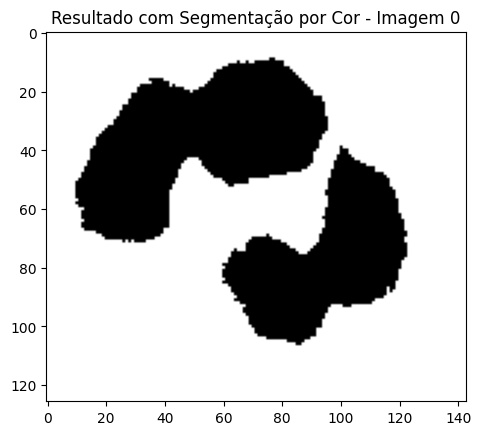

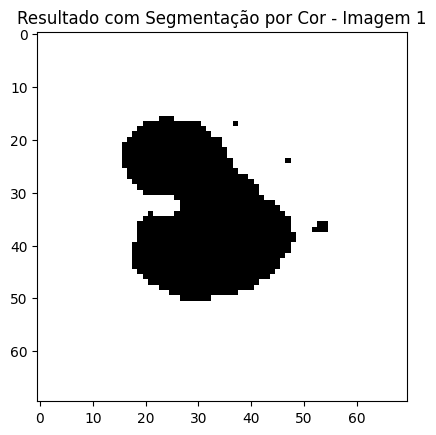

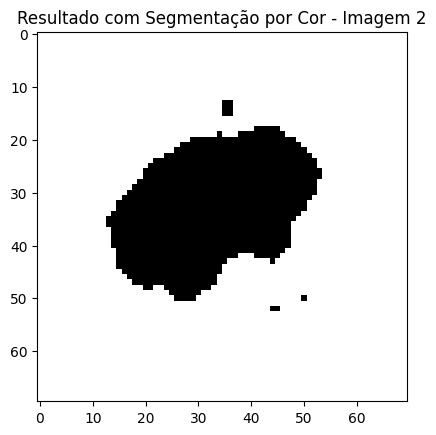

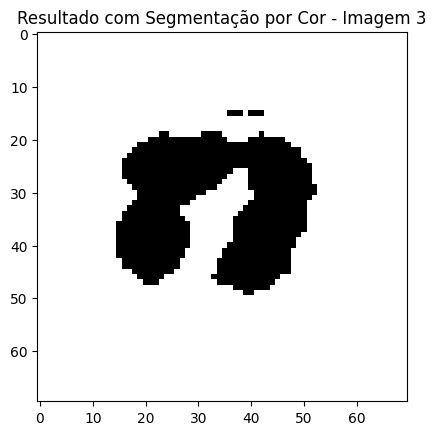

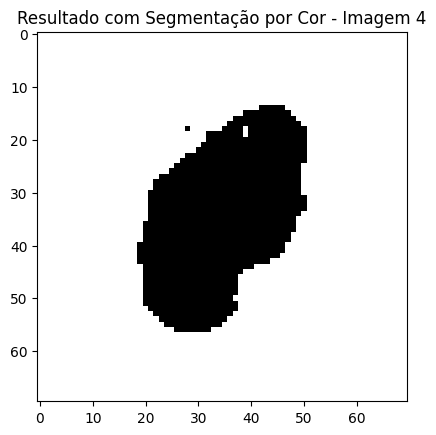

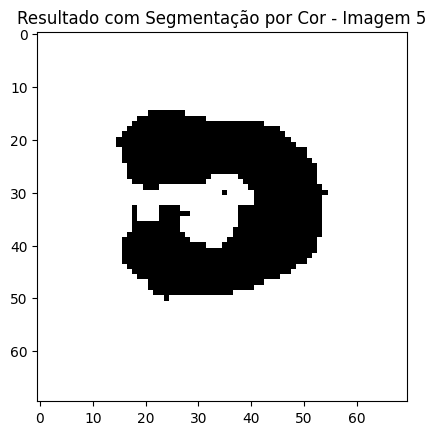

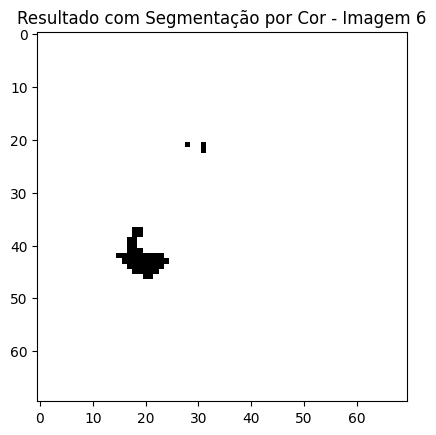

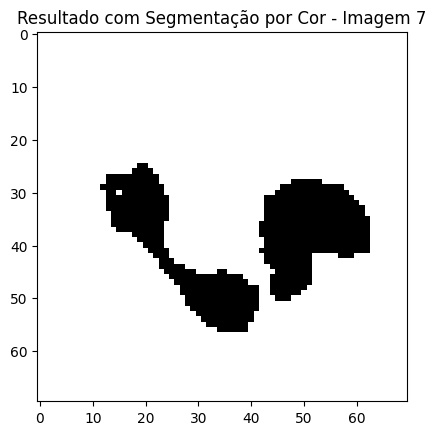

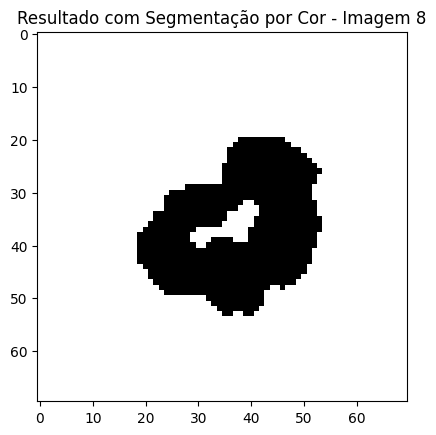

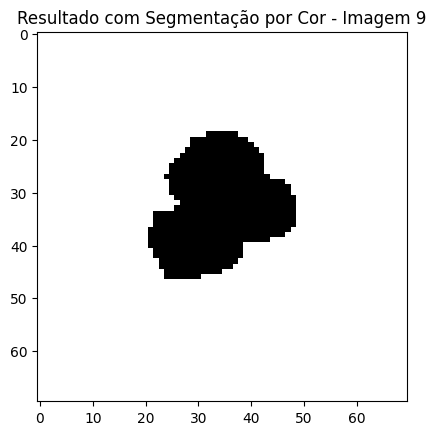

In [28]:

for i in range(10):
    imagem = cv2.imread(f'dataset_neutrofilos/neutrofilo0{i}.png')
    imagem_celula = isolar_celula(imagem)
    imagem_cinza = cv2.cvtColor(imagem_celula, cv2.COLOR_BGR2GRAY)
    _, binario = cv2.threshold(imagem_cinza, 100, 255, cv2.THRESH_BINARY)
    plt.imshow(binario, cmap='gray')
    plt.title(f'Resultado com Segmentação por Cor - Imagem {i}')
    plt.show()



In [32]:
import cv2
import numpy as np

def nada(x):
    # Função vazia necessária para a criação dos trackbars
    pass

# --- Carregamento e Preparação das Imagens ---

# Caminhos para as duas imagens
caminho_neutrofilo = "dataset_neutrofilos/neutrofilo03.png"
caminho_linfocito = "dataset_linfocitos/linfocito00.png"

# Carrega a imagem 1 (Neutrófilo)
img1_bgr = cv2.imread(caminho_neutrofilo)
if img1_bgr is None:
    print(f"Erro: Imagem não encontrada em '{caminho_neutrofilo}'.")
    exit()

# Carrega a imagem 2 (Linfócito)
img2_bgr = cv2.imread(caminho_linfocito)
if img2_bgr is None:
    print(f"Erro: Imagem não encontrada em '{caminho_linfocito}'.")
    exit()

# Redimensiona as imagens para um tamanho padrão para facilitar a visualização
tamanho_padrao = (400, 400) # (largura, altura)
img1_bgr = cv2.resize(img1_bgr, tamanho_padrao)
img2_bgr = cv2.resize(img2_bgr, tamanho_padrao)

# Converte ambas para o espaço de cores HSV
img1_hsv = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2HSV)


# --- Criação da Janela de Controles ---

cv2.namedWindow("Controles")

# Cria os trackbars para os limites de H, S, V
# Dica: Para pegar azul e roxo, comece com H_min por volta de 100
cv2.createTrackbar("H_min", "Controles", 37, 255, nada)
cv2.createTrackbar("H_max", "Controles", 179, 255, nada)
cv2.createTrackbar("S_min", "Controles", 118, 255, nada)
cv2.createTrackbar("S_max", "Controles", 255, 255, nada)
cv2.createTrackbar("V_min", "Controles", 0, 255, nada)
cv2.createTrackbar("V_max", "Controles", 255, 255, nada)

print("\n--- Instruções ---")
print("1. Ajuste os sliders na janela 'Controles'.")
print("2. Observe as máscaras para AMBAS as imagens mudarem em tempo real.")
print("3. O objetivo é encontrar valores que criem uma boa máscara para os dois casos.")
print("4. Quando estiver satisfeito, anote os valores de H, S, V min/max.")
print("5. Pressione 'ESC' para fechar as janelas.")


# --- Loop de Atualização em Tempo Real ---

while True:
    # Lê os valores atuais dos trackbars (serão os mesmos para ambas as imagens)
    h_min = cv2.getTrackbarPos("H_min", "Controles")
    h_max = cv2.getTrackbarPos("H_max", "Controles")
    s_min = cv2.getTrackbarPos("S_min", "Controles")
    s_max = cv2.getTrackbarPos("S_max", "Controles")
    v_min = cv2.getTrackbarPos("V_min", "Controles")
    v_max = cv2.getTrackbarPos("V_max", "Controles")

    # Define os arrays de limite
    limite_inferior = np.array([h_min, s_min, v_min])
    limite_superior = np.array([h_max, s_max, v_max])

    # --- Processa a Imagem 1 (Neutrófilo) ---
    mascara1 = cv2.inRange(img1_hsv, limite_inferior, limite_superior)
    resultado1 = cv2.bitwise_and(img1_bgr, img1_bgr, mask=mascara1)

    # --- Processa a Imagem 2 (Linfócito) ---
    mascara2 = cv2.inRange(img2_hsv, limite_inferior, limite_superior)
    resultado2 = cv2.bitwise_and(img2_bgr, img2_bgr, mask=mascara2)

    # --- Exibição Combinada ---

    # Empilha as imagens originais e os resultados para exibição lado a lado
    originais = np.hstack((img1_bgr, img2_bgr))

    # Converte máscaras de 1 canal para 3 canais BGR para poder empilhar com imagens coloridas
    mascara1_bgr = cv2.cvtColor(mascara1, cv2.COLOR_GRAY2BGR)
    mascara2_bgr = cv2.cvtColor(mascara2, cv2.COLOR_GRAY2BGR)
    mascaras = np.hstack((mascara1_bgr, mascara2_bgr))

    resultados = np.hstack((resultado1, resultado2))

    # Empilha tudo verticalmente para uma única janela de visualização
    visualizacao_final = np.vstack((originais, mascaras, resultados))

    cv2.imshow("Resultados (Neutrófilo à Esquerda, Linfócito à Direita)", visualizacao_final)

    # Espera por uma tecla. Se for 'ESC', sai do loop
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

# Destroi todas as janelas ao sair
cv2.destroyAllWindows()


--- Instruções ---
1. Ajuste os sliders na janela 'Controles'.
2. Observe as máscaras para AMBAS as imagens mudarem em tempo real.
3. O objetivo é encontrar valores que criem uma boa máscara para os dois casos.
4. Quando estiver satisfeito, anote os valores de H, S, V min/max.
5. Pressione 'ESC' para fechar as janelas.


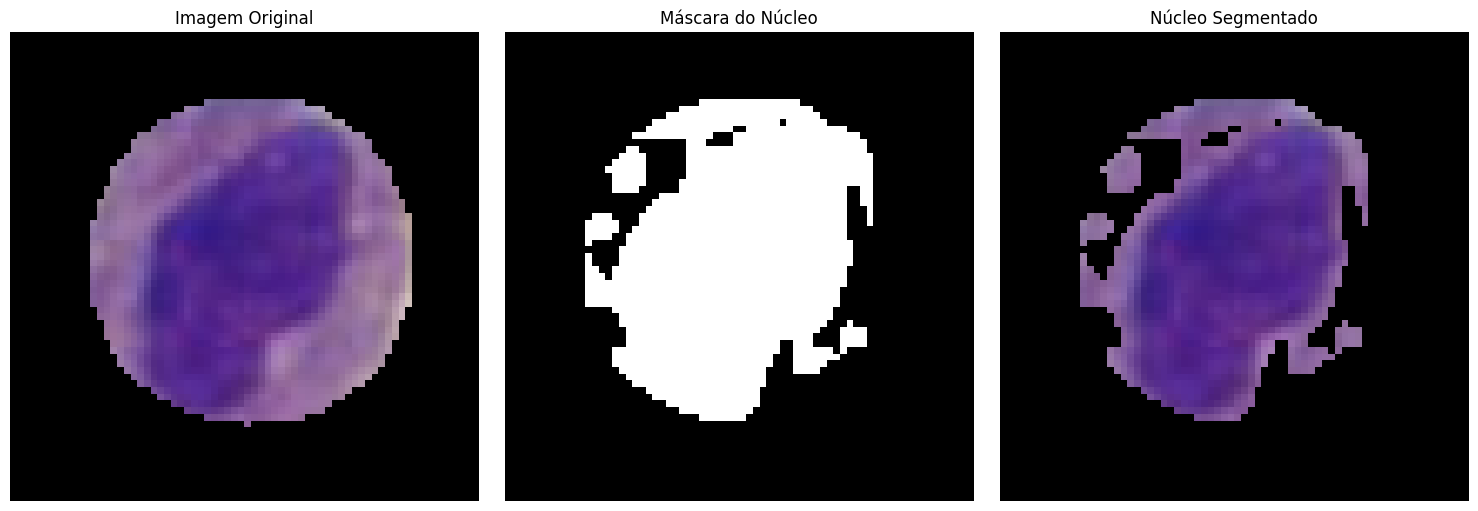

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segmentar_e_mostrar_nucleo(caminho_imagem: str):
    img_bgr = cv2.imread(caminho_imagem)
    if img_bgr is None:
        print(f"Erro: Não foi possível carregar a imagem em '{caminho_imagem}'")
        return

    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    limite_inferior = np.array([21, 40, 0])
    limite_superior = np.array([134, 255, 255])

    mascara = cv2.inRange(img_hsv, limite_inferior, limite_superior)

    nucleo_bgr = cv2.bitwise_and(img_bgr, img_bgr, mask=mascara)

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    nucleo_rgb = cv2.cvtColor(nucleo_bgr, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem Original
    axes[0].imshow(img_rgb)
    axes[0].set_title('Imagem Original')
    axes[0].axis('off')

    # Máscara Gerada
    axes[1].imshow(mascara, cmap='gray') # cmap='gray' é essencial para máscaras
    axes[1].set_title('Máscara do Núcleo')
    axes[1].axis('off')

    # Núcleo Segmentado
    axes[2].imshow(nucleo_rgb)
    axes[2].set_title('Núcleo Segmentado')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


# --- Exemplo de Uso ---
# Substitua pelo caminho da sua imagem
caminho_da_imagem = "dataset_neutrofilos/neutrofilo03.png"
#caminho_da_imagem = "dataset_linfocitos/linfocito02.png"
segmentar_e_mostrar_nucleo(caminho_da_imagem)

(np.float64(-0.5), np.float64(69.5), np.float64(69.5), np.float64(-0.5))

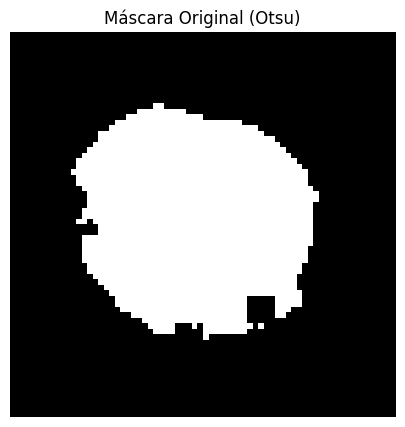

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def criar_mapa_prob_nucleo(img_bgr: np.ndarray) -> np.ndarray:
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    H, S, V = cv2.split(hsv)

    # Normaliza Saturação e Valor para o intervalo [0, 1]
    S /= 255.0
    V /= 255.0

    h_min_nucleo = 100  # Limite inferior (azul)
    h_max_nucleo = 170  # Limite superior (magenta)

    # Calcula a pontuação baseada se o matiz está dentro da faixa
    # Usamos uma função suave (gaussiana) centrada na nossa faixa para dar mais peso ao centro
    centro_faixa = (h_min_nucleo + h_max_nucleo) / 2
    largura_faixa = (h_max_nucleo - h_min_nucleo) / 2

    # np.exp cria uma curva suave. Pixels no centro da faixa (ex: 135) terão score 1.0
    # Pixels nas bordas (100 ou 170) terão score menor, e fora da faixa, score próximo de 0.
    hue_score = np.exp(-((H - centro_faixa) / largura_faixa)**2)

    # Combina hue, saturação e valor. Damos um peso alto para saturação e escuridão.
    # A Saturação (S) é importante para diferenciar do fundo branco/cinza.
    # O Valor (1 - V) é importante porque núcleos são escuros.
    prob = hue_score * (S**0.7) * ((1.0 - V)**0.7)

    # Normaliza o mapa de probabilidade final para 0-255 (uint8)
    prob_norm = cv2.normalize(prob, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return prob_norm

# --- Aplicação e Visualização ---

# Carrega as duas imagens
neutrofilo_bgr = cv2.imread("dataset_neutrofilos/neutrofilo05.png")
linfocito_bgr = cv2.imread("dataset_linfocitos/linfocito00.png")

# 1. Gera os mapas de probabilidade para cada imagem
mapa_prob_neutrofilo = criar_mapa_prob_nucleo(neutrofilo_bgr)
mapa_prob_linfocito = criar_mapa_prob_nucleo(linfocito_bgr)

# 2. Aplica um threshold automático (Otsu) para obter a máscara final
# O Otsu's Binarization encontra o valor de limiar ideal automaticamente!
_, mascara_neutrofilo = cv2.threshold(mapa_prob_neutrofilo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# ... (código anterior para gerar a mascara_neutrofilo) ...

# 3. Aplica um threshold automático (Otsu)
_, mascara_otsu = cv2.threshold(mapa_prob_neutrofilo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Exiba 'mascara_otsu' e 'mascara_precisa' lado a lado para ver a diferença.

plt.figure(figsize=(10, 5))
plt.title("Máscara Original (Otsu)")
plt.imshow(mascara_otsu, cmap='gray')
plt.axis('off')


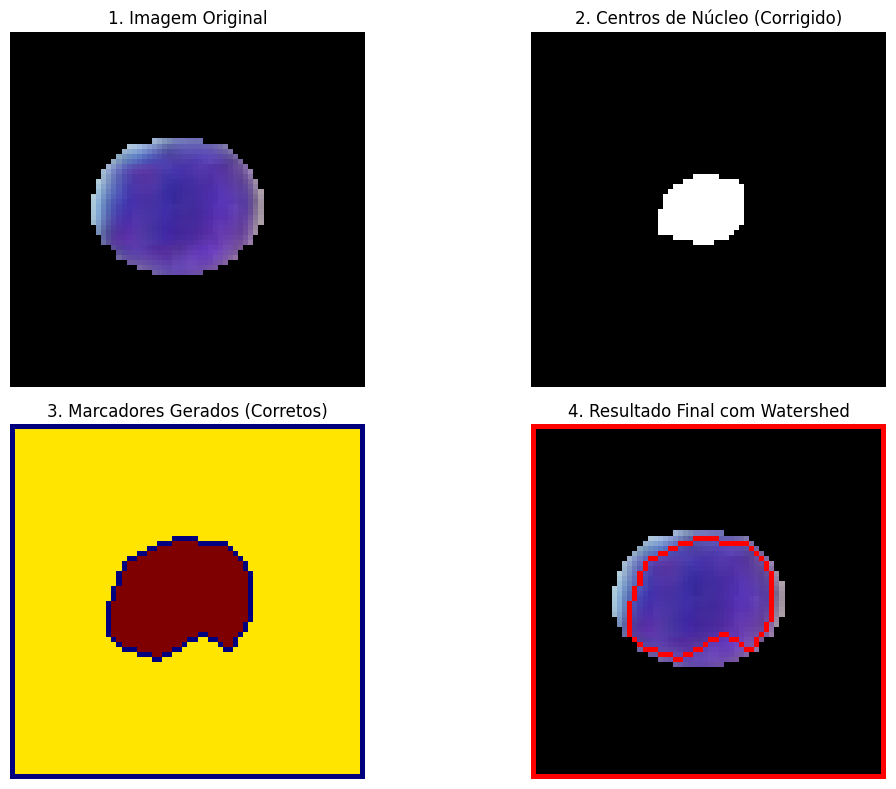

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def criar_mapa_prob_preciso(img_bgr: np.ndarray) -> np.ndarray:
    """
    Cria um mapa de probabilidade refinado, combinando informação de cor e de borda.
    Esta função é robusta para identificar o núcleo, independentemente do fundo.
    """
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    H, S, V = cv2.split(hsv)
    S /= 255.0; V /= 255.0
    h_min_nucleo, h_max_nucleo = 100, 170
    centro_faixa = (h_min_nucleo + h_max_nucleo) / 2
    largura_faixa = (h_max_nucleo - h_min_nucleo) / 2
    hue_score = np.exp(-((H - centro_faixa) / largura_faixa)**2)
    mapa_cor = hue_score * (S**0.7) * ((1.0 - V)**0.5)
    mapa_cor = cv2.normalize(mapa_cor, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)

    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3); grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
    magnitude_gradiente = cv2.magnitude(grad_x, grad_y)
    mapa_bordas = cv2.normalize(magnitude_gradiente, None, 0, 1, cv2.NORM_MINMAX)
    mapa_anti_bordas = 1.0 - mapa_bordas

    mapa_final = mapa_cor * mapa_anti_bordas
    return cv2.normalize(mapa_final, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# --- Carregamento e Preparação ---
caminho_imagem = "dataset_neutrofilos/neutrofilo01.png"
caminho_imagem = "dataset_linfocitos/linfocito02.png"
img_bgr = cv2.imread(caminho_imagem)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# --- Início do Pipeline Watershed ---

# 1. Obter máscara de alta qualidade
mapa_prob = criar_mapa_prob_preciso(img_bgr)
_, mascara_binaria = cv2.threshold(mapa_prob, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. (AJUSTE OPCIONAL) Limpeza morfológica para remover ruído
kernel = np.ones((3,3), np.uint8)
mascara_limpa = cv2.morphologyEx(mascara_binaria, cv2.MORPH_OPEN, kernel, iterations=2)

# 3. Área de fundo garantida
fundo_garantido = mascara_limpa.copy()

# 4. Área de primeiro plano garantida (núcleo)
dist_transform = cv2.distanceTransform(mascara_limpa, cv2.DIST_L2, 5)

# --- LINHA DE CORREÇÃO PRINCIPAL ---
# Aumentamos o limiar de 0.5 para 0.7 para sermos mais seletivos
# com o que consideramos um "centro de núcleo". Isso elimina os falsos positivos.
_, primeiro_plano_garantido = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
primeiro_plano_garantido = np.uint8(primeiro_plano_garantido)

# 5. Região da dúvida
regiao_desconhecida = cv2.subtract(mascara_limpa, primeiro_plano_garantido)

# 6. Criar marcadores
_, marcadores = cv2.connectedComponents(primeiro_plano_garantido)
marcadores = marcadores + 1
marcadores[regiao_desconhecida == 255] = 0

# 7. Aplicar Watershed
cv2.watershed(img_bgr, marcadores)

# 8. Visualizar o resultado
img_contorno_watershed = img_rgb.copy()
img_contorno_watershed[marcadores == -1] = [255, 0, 0] # Vermelho

# --- Exibição Comparativa ---
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("1. Imagem Original")
plt.axis('off')

plt.subplot(2, 2, 2)
# Exibindo o primeiro plano para ver se a região extra sumiu
plt.imshow(primeiro_plano_garantido, cmap='gray')
plt.title("2. Centros de Núcleo (Corrigido)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(marcadores, cmap='jet')
plt.title("3. Marcadores Gerados (Corretos)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_contorno_watershed)
plt.title("4. Resultado Final com Watershed")
plt.axis('off')

plt.tight_layout()
plt.show()

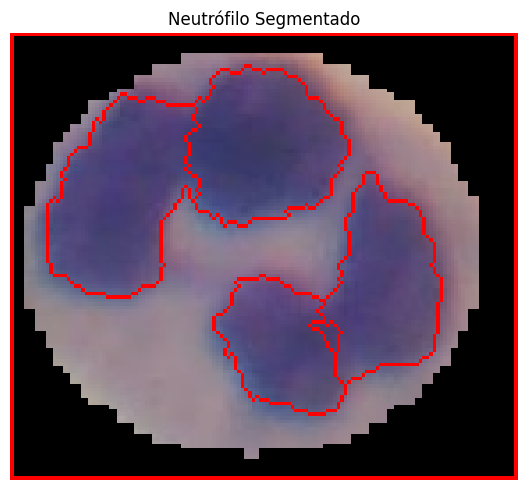

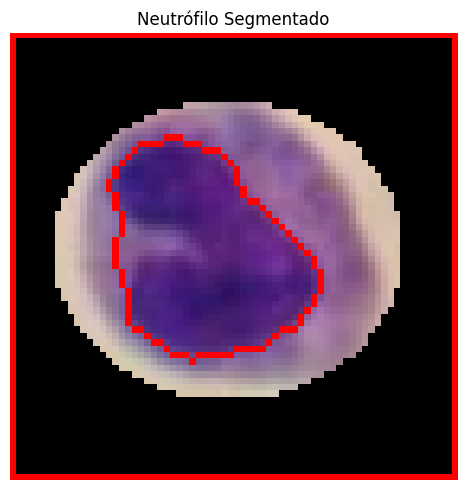

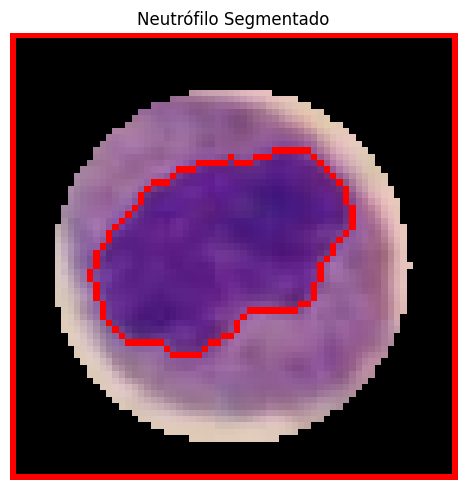

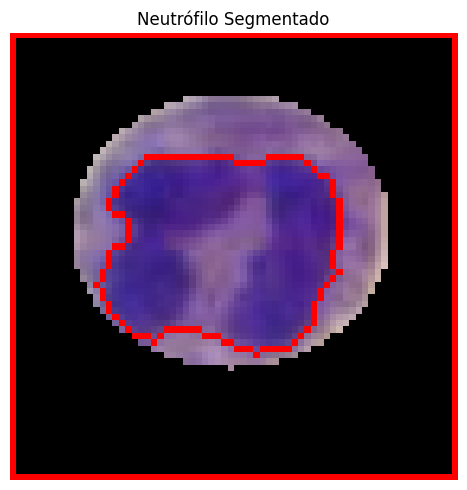

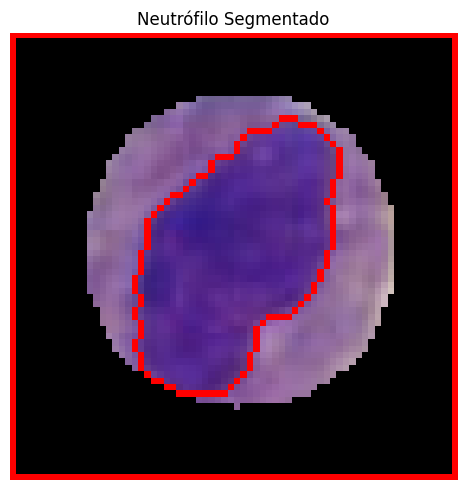

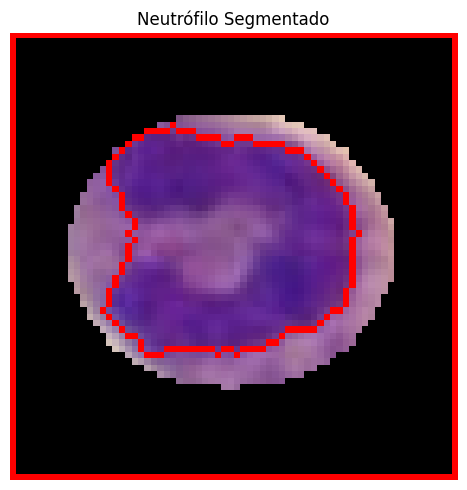

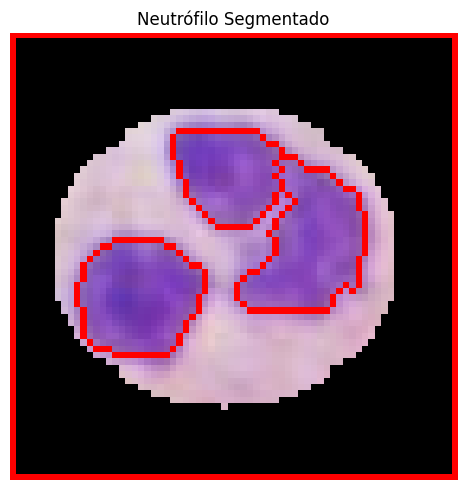

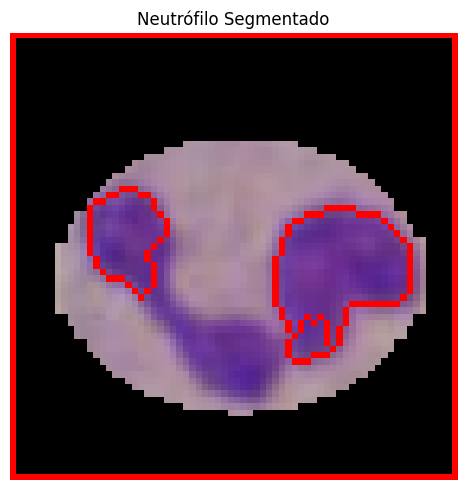

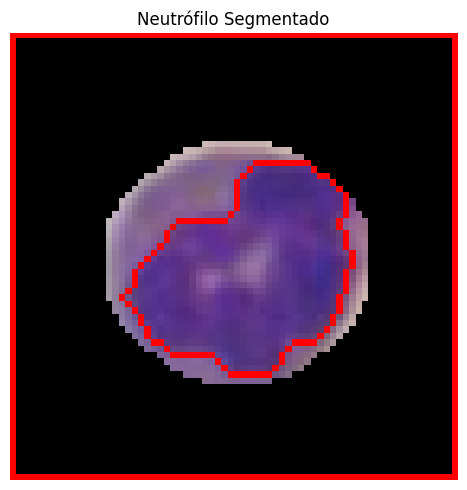

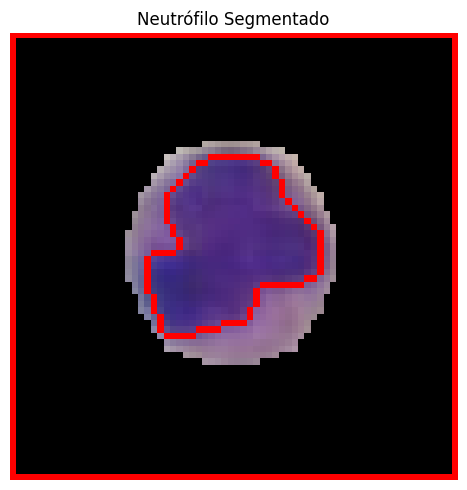

In [31]:
import cv2
import numpy as np

def segmentar_nucleo_watershed_v2(caminho_imagem: str) -> np.ndarray:
    def _criar_mapa_prob_preciso(img_bgr: np.ndarray) -> np.ndarray:
        hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
        H, S, V = cv2.split(hsv)
        S /= 255.0; V /= 255.0
        h_min_nucleo, h_max_nucleo = 100, 170
        centro_faixa = (h_min_nucleo + h_max_nucleo) / 2
        largura_faixa = (h_max_nucleo - h_min_nucleo) / 2
        hue_score = np.exp(-((H - centro_faixa) / largura_faixa)**2)
        mapa_cor = hue_score * (S**0.7) * ((1.0 - V)**0.5)
        mapa_cor = cv2.normalize(mapa_cor, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
        gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3); grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
        magnitude_gradiente = cv2.magnitude(grad_x, grad_y)
        mapa_bordas = cv2.normalize(magnitude_gradiente, None, 0, 1, cv2.NORM_MINMAX)
        mapa_anti_bordas = 1.0 - mapa_bordas
        mapa_final = mapa_cor * mapa_anti_bordas
        return cv2.normalize(mapa_final, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    img_bgr = cv2.imread(caminho_imagem)
    if img_bgr is None:
        raise FileNotFoundError(f"Erro: Não foi possível ler a imagem no caminho '{caminho_imagem}'")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 1. Criar a máscara inicial com Otsu
    mapa_prob = _criar_mapa_prob_preciso(img_bgr)
    _, mascara_binaria = cv2.threshold(mapa_prob, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 2. Limpeza morfológica para remover ruídos
    kernel = np.ones((3,3), np.uint8)
    mascara_limpa = cv2.morphologyEx(mascara_binaria, cv2.MORPH_OPEN, kernel, iterations=2)

    # 3. Área de primeiro plano garantida (usando transformada de distância)
    dist_transform = cv2.distanceTransform(mascara_limpa, cv2.DIST_L2, 5)
    _, primeiro_plano_garantido = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    primeiro_plano_garantido = np.uint8(primeiro_plano_garantido)

    # 4. Área de fundo garantida
    fundo_garantido = mascara_limpa.copy()

    # 5. Região da dúvida
    regiao_desconhecida = cv2.subtract(fundo_garantido, primeiro_plano_garantido)

    # 6. Criar e preparar os marcadores
    _, marcadores = cv2.connectedComponents(primeiro_plano_garantido)
    marcadores = marcadores + 1
    marcadores[regiao_desconhecida == 255] = 0

    # 7. Aplicar o Watershed
    # A função cv2.watershed exige uma imagem BGR
    cv2.watershed(img_bgr, marcadores)

    # 8. Criar a imagem de saída com os contornos
    img_contorno_watershed = img_rgb.copy()
    img_contorno_watershed[marcadores == -1] = [255, 0, 0] # Contornos em vermelho

    return img_contorno_watershed

if __name__ == '__main__':
    import matplotlib.pyplot as plt


    for i in range(10):
        caminho_imagem_neutrofilo = f"dataset_neutrofilos/neutrofilo0{i}.png"

        try:
            resultado_neutrofilo = segmentar_nucleo_watershed_v2(caminho_imagem_neutrofilo)

            plt.figure(figsize=(10, 5))

            plt.imshow(resultado_neutrofilo)
            plt.title("Neutrófilo Segmentado")
            plt.axis('off')


            plt.tight_layout()
            plt.show()

        except FileNotFoundError as e:
            print(e)

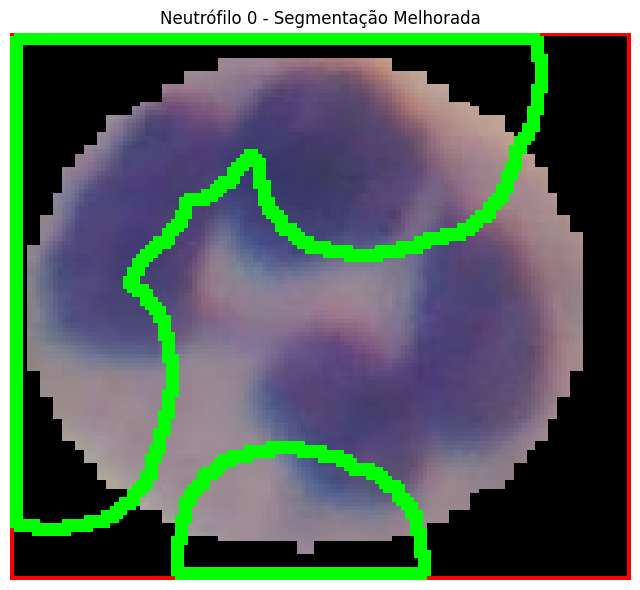

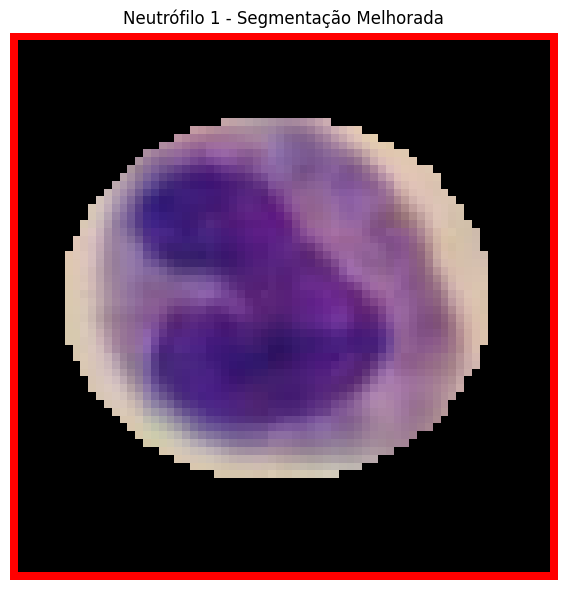

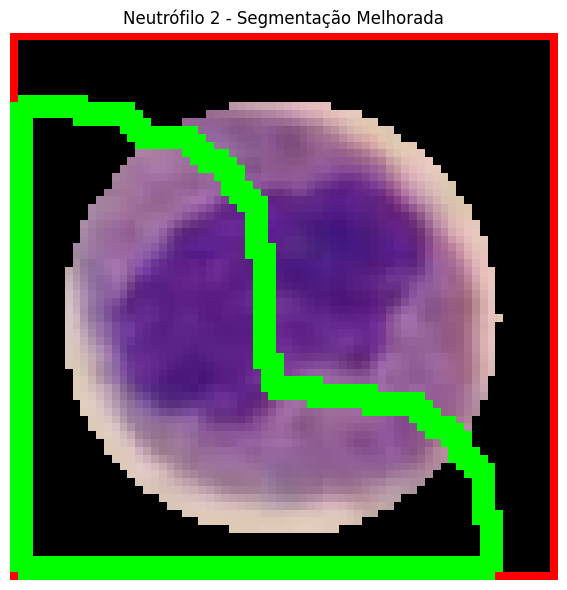

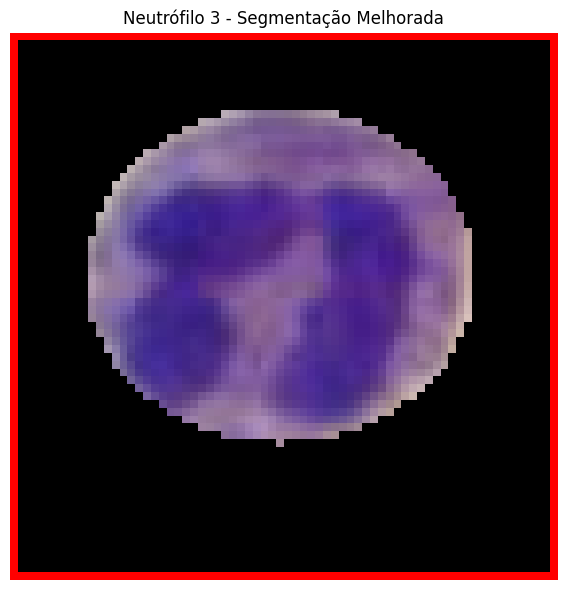

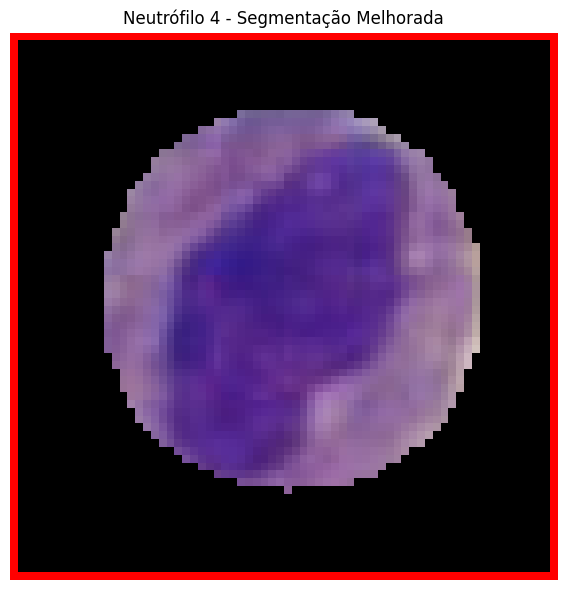

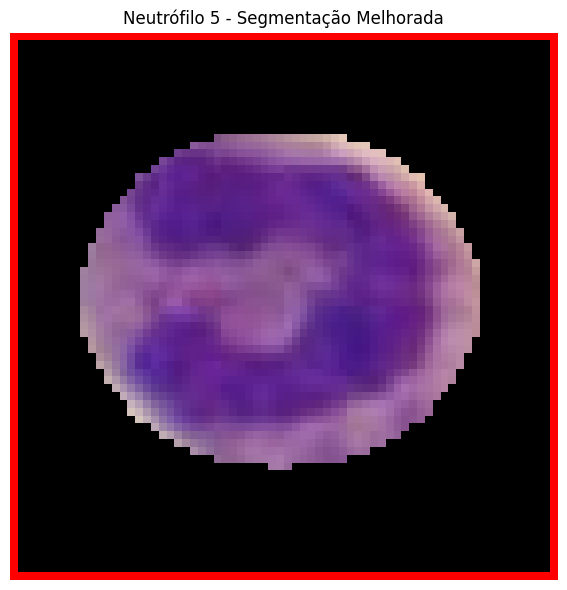

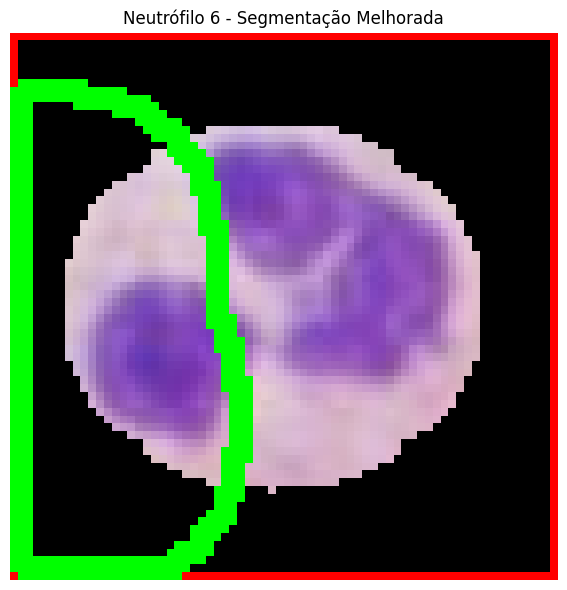

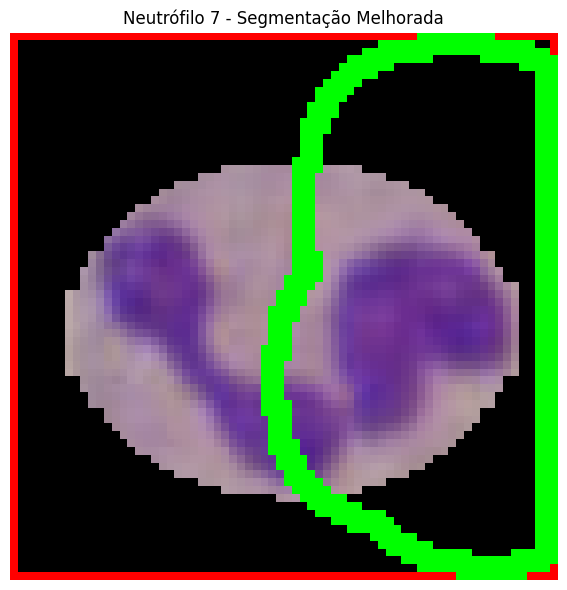

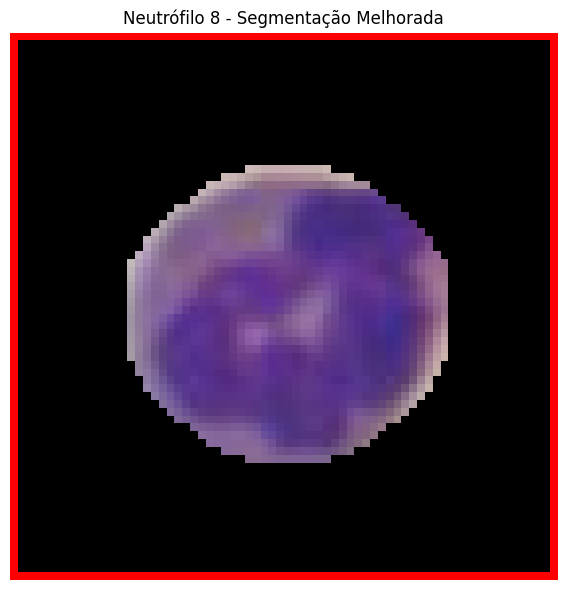

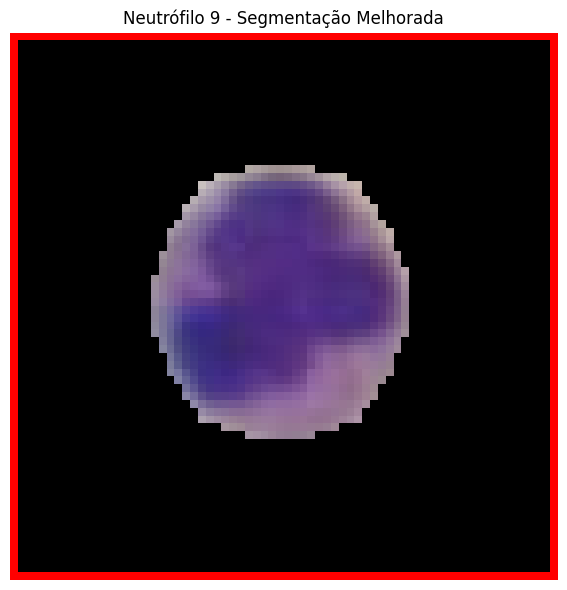

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def _criar_mapa_prob_melhorado(img_bgr: np.ndarray) -> np.ndarray:
        # Pré-processamento para reduzir ruído
        img_suavizada = cv2.GaussianBlur(img_bgr, (5, 5), 0)

        # Conversão para HSV com múltiplas faixas para núcleos
        hsv = cv2.cvtColor(img_suavizada, cv2.COLOR_BGR2HSV).astype(np.float32)
        H, S, V = cv2.split(hsv)
        S /= 255.0; V /= 255.0

        # Múltiplas faixas de HUE para capturar variações de cor dos núcleos
        hue_score1 = np.exp(-((H - 120) / 25)**2)  # Faixa azul/roxo
        hue_score2 = np.exp(-((H - 160) / 20)**2)  # Faixa rosa
        hue_score = np.maximum(hue_score1, hue_score2)

        # Mapas de saturação e valor ajustados
        mapa_sat = np.power(S, 0.8)
        mapa_val = np.power(1.0 - V, 0.6)

        # Combinação dos mapas
        mapa_cor = hue_score * mapa_sat * mapa_val

        # Usar canal azul para detecção adicional (núcleos tendem a ser mais azulados)
        B, G, R = cv2.split(img_suavizada)
        canal_azul = B.astype(np.float32) / 255.0
        mapa_azul = np.power(canal_azul, 1.2)

        # Combinação final
        mapa_final = mapa_cor * 0.7 + mapa_azul * 0.3
        return cv2.normalize(mapa_final, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

def segmentar_nucleo_watershed_melhorado(caminho_imagem: str) -> np.ndarray:

    img_bgr = cv2.imread(caminho_imagem)
    if img_bgr is None:
        raise FileNotFoundError(f"Erro: Não foi possível ler a imagem no caminho '{caminho_imagem}'")

    # Redimensionar se a imagem for muito grande
    altura, largura = img_bgr.shape[:2]
    if max(altura, largura) > 800:
        escala = 800 / max(altura, largura)
        nova_largura = int(largura * escala)
        nova_altura = int(altura * escala)
        img_bgr = cv2.resize(img_bgr, (nova_largura, nova_altura))

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 1. Criar mapa de probabilidade melhorado
    mapa_prob = _criar_mapa_prob_melhorado(img_bgr)

    # 2. Threshold adaptativo para lidar com variações de iluminação
    mascara_binaria = cv2.adaptiveThreshold(
        mapa_prob, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 3. Limpeza morfológica mais robusta
    kernel = np.ones((3, 3), np.uint8)
    mascara_limpa = cv2.morphologyEx(mascara_binaria, cv2.MORPH_OPEN, kernel, iterations=2)
    mascara_limpa = cv2.morphologyEx(mascara_limpa, cv2.MORPH_CLOSE, kernel, iterations=2)

    # 4. Preencher buracos
    mascara_preenchida = mascara_limpa.copy()
    contours, _ = cv2.findContours(mascara_limpa, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.fillPoly(mascara_preenchida, [contour], 255)

    # 5. Transformada de distância com parâmetros ajustados
    dist_transform = cv2.distanceTransform(mascara_preenchida, cv2.DIST_L2, 5)
    _, primeiro_plano = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)
    primeiro_plano = np.uint8(primeiro_plano)

    # 6. Encontrar marcadores com connectedComponents
    _, marcadores = cv2.connectedComponents(primeiro_plano)

    # 7. Fundo garantido - dilatar a máscara e subtrair o primeiro plano
    kernel_grande = np.ones((7, 7), np.uint8)
    fundo_garantido = cv2.dilate(mascara_preenchida, kernel_grande, iterations=3)
    fundo_garantido = cv2.bitwise_not(fundo_garantido)

    # 8. Configurar marcadores para watershed
    marcadores = marcadores + 1
    marcadores[fundo_garantido == 255] = 0

    # 9. Aplicar watershed
    img_watershed = img_bgr.copy()
    cv2.watershed(img_watershed, marcadores)

    # 10. Criar imagem de resultado
    img_resultado = img_rgb.copy()
    img_resultado[marcadores == -1] = [255, 0, 0]  # Contornos em vermelho

    # 11. Adicionar contornos coloridos para diferentes núcleos
    cores_contorno = [[0, 255, 0], [255, 255, 0], [0, 255, 255], [255, 0, 255]]
    for i in range(1, np.max(marcadores)):
        if i == 0:  # Pular fundo
            continue
        mascara_nucleo = (marcadores == i).astype(np.uint8) * 255
        contours, _ = cv2.findContours(mascara_nucleo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cor = cores_contorno[(i-1) % len(cores_contorno)]
        cv2.drawContours(img_resultado, contours, -1, cor, 2)

    return img_resultado

# Função para visualizar resultados intermediários (útil para debug)
def visualizar_etapas(caminho_imagem):
    img_bgr = cv2.imread(caminho_imagem)
    mapa_prob = _criar_mapa_prob_melhorado(img_bgr)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(mapa_prob, cmap='hot')
    plt.title('Mapa de Probabilidade')
    plt.axis('off')

    # ... adicione mais visualizações conforme necessário

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    for i in range(10):
        caminho_imagem_neutrofilo = f"dataset_neutrofilos/neutrofilo0{i}.png"

        try:
            resultado = segmentar_nucleo_watershed_melhorado(caminho_imagem_neutrofilo)

            plt.figure(figsize=(12, 6))
            plt.imshow(resultado)
            plt.title(f"Neutrófilo {i} - Segmentação Melhorada")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

        except FileNotFoundError as e:
            print(e)
        except Exception as e:
            print(f"Erro ao processar imagem {i}: {str(e)}")